#**Tópico 4 - Gráficos**




### *Categorização das variáveis*

1.   Data (date) - qualitativa ordinal
2.   Estado (state) - qualitativa nominal
3.   Cidade (city) - qualitativa nominal
4.   Tipo de lugar (place_type)-qualitativa nominal
5.   Confirmados (confirmed) - quantitativa discreta
6.   Mortes (deaths) - quantitativa discreta
7.   número da atualização (order_for_place) - quantitativa discreta
8.   é a última atualização? (is_last) - qualitativa nominal
9.   População estimada em 2019 (estimated_population_2019) - quantitativa discreta
10.  População atual estimada (estimated_population) - quantitativa discreta
11.  Codigo ibge da cidade (city_ibge_code) - quantitativa discreta
12.  Confimardos por 100 mil habitantes (confirmed_per_100k_inhabitants) - quantitativa contínua
13.  Taxa de mortalidade (death_rate) - quantitativa contínua












In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#https://drive.google.com/file/d/1BTFYuBPpH8gftDT4vKxiy9VVJH37vKHd/view?usp=sharing
codigo = "1BTFYuBPpH8gftDT4vKxiy9VVJH37vKHd"
arquivo = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
dados = pd.read_csv(arquivo, sep=',', decimal='.')

In [ ]:
estados=dados.query('place_type=="state" & is_last==True')
sudeste=estados.query("state == 'SP'|state=='RJ'|state=='MG'|state=='ES'")
nordeste=estados.query("state == 'PI'|state=='MA'|state=='BA'|state=='PE'|state=='PB'|state=='AL'|state=='SE'|state=='CE'|state=='RN'")
centro_oeste=estados.query("state=='GO'|state=='MT'|state=='MS'")
sul=estados.query("state == 'PR'|state=='SC'|state=='RS'")
norte=estados.query("state == 'AM'|state=='PA'|state=='MS'|state=='RO'|state=='TO'|state=='AC'|state=='AP'|state=='RR'")
regiões=[sul.sum(), sudeste.sum(), norte.sum(), nordeste.sum(), centro_oeste.sum()]
regiões=pd.concat(regiões)

## *1.Barras. Qual a diferença dos dados de número de casos confirmados entre os Estados?*

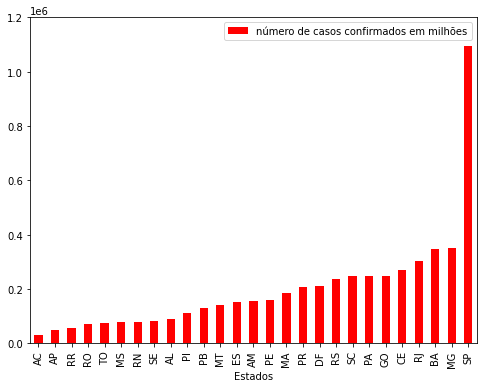

In [ ]:
estados.sort_values(by="confirmed").plot(x='state',y='confirmed',kind='bar', color='red',figsize=(8, 6))
plt.xlabel('Estados')
plt.yticks([0,200000,400000,600000,800000,1000000,1200000])
plt.legend(['número de casos confirmados em milhões'])
plt.show()

## *2.Setores. Exibir a diferença nas mortes por covid de cada região em relação ao número total de falecimentos no Brasil*

<function matplotlib.pyplot.show>

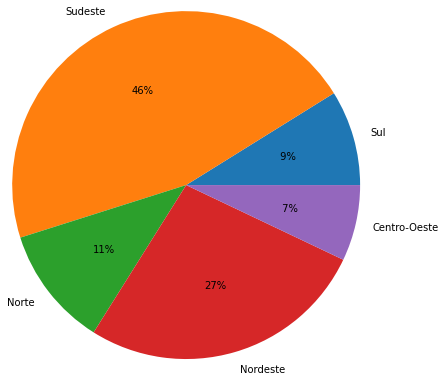

In [ ]:
plt.pie(x=regiões.deaths, labels=['Sul','Sudeste','Norte','Nordeste','Centro-Oeste'], radius=2, autopct="%2.f%%")
plt.show

## *3.Linha. Exibir a relação entre a população estimada e a quantidade mortes*

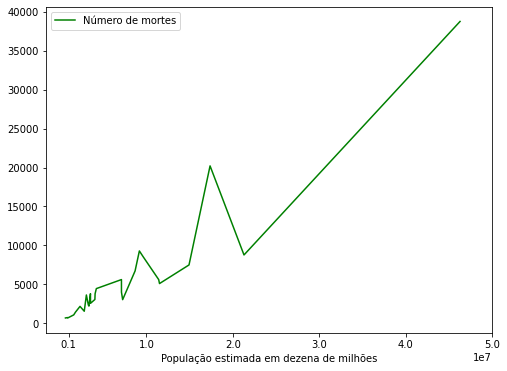

In [ ]:
estados.sort_values(by="estimated_population").plot(x='estimated_population',y='deaths', color='green', figsize=(8, 6))
plt.xlabel('População estimada em dezena de milhões')
plt.xticks([1000000,10000000,20000000,30000000,40000000,50000000])
plt.legend(['Número de mortes'])
plt.show()

## *4.Histograma. Exibir a distribuição do número de mortes nos Estados*

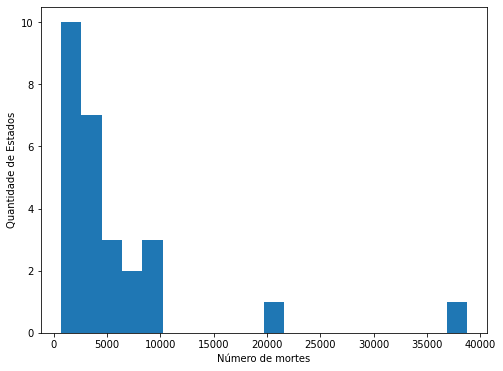

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(estados.deaths, bins=20)
plt.xlabel('Número de mortes')
plt.ylabel('Quantidade de Estados')
plt.yticks([0,2,4,6,8,10])
plt.show()

## *5.Boxplot. Exibir as medidas de tendência central e dispersão da média de infectados para cada 100 mil habitantes*

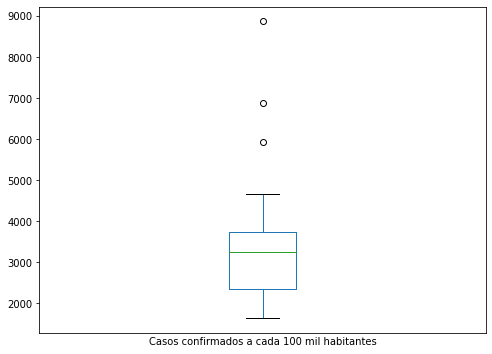

In [ ]:
estados.confirmed_per_100k_inhabitants.plot(kind="box", figsize=(8,6))
plt.xlabel('Casos confirmados a cada 100 mil habitantes')
plt.xticks([2],[''])
plt.show()

## *6.Dispersão. Existe relação entre a taxa de mortalidade com o tamanho da população?*

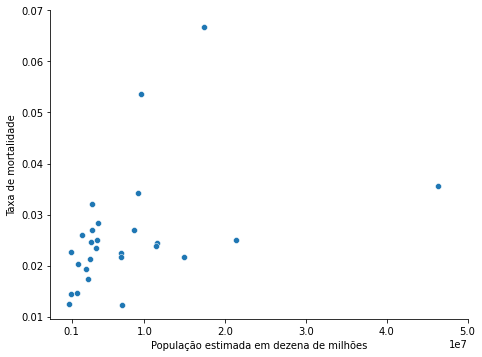

In [ ]:
sns.relplot(x="estimated_population", y="death_rate", data=estados, height=5, aspect=1.3)
plt.xlabel('População estimada em dezena de milhões')
plt.ylabel('Taxa de mortalidade')
plt.yticks([0.01,0.02,0.03,0.04,0.05,0.06,0.07])
plt.xticks([1000000,10000000,20000000,30000000,40000000,50000000])
plt.show()